In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
mat = pd.read_csv("matrix4.csv",header = None)
coef = pd.read_csv("coef4.csv",header = None)
mat1 = np.array(mat)
coef = np.array(coef)
mat1 = mat1.astype(float)
coef = coef.astype(float)
mat = mat1[:,:-1]
ans = mat1[:,-1]
coef = coef[0]
ind = np.array(range(mat.shape[1]-mat.shape[0],mat.shape[1]))
ind = np.array([6,7,9,10,12,13,15,16])

In [3]:
z = np.dot(coef[ind],mat)
dec = coef - z
print(dec)

[ 2200. -2200.   400.  -400.   399.  -100.     0.     0.  -100.     0.
     0.  -100.     0.     0.  -100.     0.     0.]


In [4]:
while max(dec)>0:
    incoming = np.where(dec == max(dec))[0][0]
    divider = (mat[:,incoming])
    divider[divider==0] = 10**-8
    incd = (ans/divider)
    incd[divider<0] = 10**12
    outgoing = np.where(incd == min(incd))[0][0]
    ind[outgoing] = incoming
    ans = ans - min(incd)*mat[:,incoming]
    ans[outgoing] = min(incd)
    mat[outgoing,:]=mat[outgoing,:]/(mat[outgoing,incoming])
    for i in range(mat.shape[0]):
        if i!=outgoing:
            mat[i] = mat[i] - mat[i,incoming]*mat[outgoing]
    z = np.dot(coef[ind],mat)
    print("Mat = ")
    print(pd.DataFrame(mat))
    dec = coef - z
    print("Dec = ")
    print(dec)
    print("ans = ")
    print(ans)
    print("ind = ")
    print(ind)

Mat = 
    0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0  0.0  0.0  0.9 -0.9  0.9 -1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.1   
1  0.0  0.0  0.9 -0.9 -1.1  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.1   
2  0.0  0.0  0.6 -0.6  0.6  0.0  0.0  0.0 -1.0  1.0  0.0  0.0  0.0  0.0  0.4   
3  0.0  0.0  0.6 -0.6 -1.4  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.4   
4  0.0  0.0  0.3 -0.3  0.3  0.0  0.0  0.0  0.0  0.0  0.0 -1.0  1.0  0.0  0.7   
5  0.0  0.0  0.3 -0.3 -1.7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.7   
6  1.0 -1.0  0.1 -0.1  0.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 -0.1   
7  0.0  0.0  0.0  0.0 -2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   

    15   16  
0 -0.1  0.0  
1 -0.1  0.0  
2 -0.4  0.0  
3 -0.4  0.0  
4 -0.7  0.0  
5 -0.7  0.0  
6  0.1  0.0  
7 -1.0  1.0  
Dec = 
[   0.    0.  180. -180.  179. -100.    0.    0. -100.    0.    0. -100.
    0.    0.  120. -220.    0.]
ans = 
[1.5 1.5 5.  5.  1.5 1.5 3.

In [5]:
ind

array([ 4,  5, 11, 10, 14, 13,  0,  2])

In [6]:
dec

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.66666669e-09,
        0.00000000e+00,  0.00000000e+00, -1.00000000e+02, -3.33333332e-01,
       -5.00000001e-01, -9.95000000e+01,  0.00000000e+00,  0.00000000e+00,
       -1.00000000e+02,  0.00000000e+00,  0.00000000e+00, -1.00000000e+02,
       -1.66666670e-01])

In [7]:
ans

array([2.00000001, 4.00000004, 2.99999999, 4.00000001, 3.99999998,
       1.00000002, 3.33333332, 3.66666672])

In [8]:
mat.shape

(8, 17)

In [9]:
mat

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.66666669e-09,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -3.33333332e-01, -5.00000001e-01,
         5.00000001e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.66666670e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -3.33333344e-09,  0.00000000e+00,  1.00000000e+00,
        -1.00000000e+00,  3.33333331e-01, -1.00000001e+00,
         1.00000001e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -3.33333326e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         3.33333332e-09,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -3.33333336e-01, -9.99999999e-01,
         9.99999999e-01,  0.00000000e+00,  1.00000000e+00,
        -1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  3.3

In [10]:
# Comparing Solution of best fit line by minimizing L2 norm(least squares) and Linfinity norm

In [12]:
X = np.array([[1,1],[4,1],[7,1],[10,1]])
Y = np.array([5,19,26,35])

In [13]:
inv = np.linalg.inv(np.dot(np.transpose(X),X))
ans = np.dot(inv,np.dot(np.transpose(X),Y))

In [14]:
x = np.linspace(0,15)

In [15]:
y1 = ans[0]*x + ans[1]
y2 = 3.33333332*x + 3.66666672

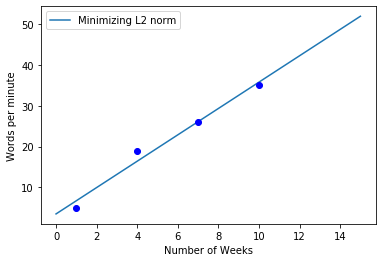

In [19]:
plt.plot(x,y1,label = "Minimizing L2 norm")
plt.plot([1,4,7,10],Y,"bo")
plt.xlabel("Number of Weeks")
plt.ylabel("Words per minute")
plt.legend()
plt.show()

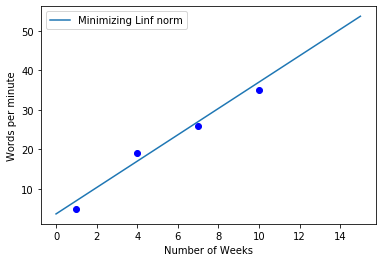

In [20]:
plt.plot(x,y2,label = "Minimizing Linf norm")
plt.plot([1,4,7,10],Y,"bo")
plt.xlabel("Number of Weeks")
plt.ylabel("Words per minute")
plt.legend()
plt.show()

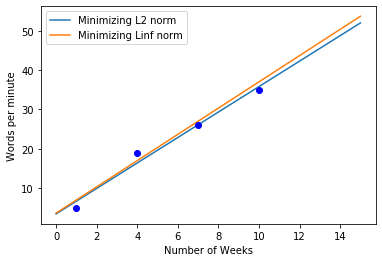

In [21]:
plt.plot(x,y1,label = "Minimizing L2 norm")
plt.plot(x,y2,label = "Minimizing Linf norm")
plt.plot([1,4,7,10],Y,"bo")
plt.xlabel("Number of Weeks")
plt.ylabel("Words per minute")
plt.legend()
plt.show()